In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import winsound

In [33]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [34]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [35]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [36]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [37]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [38]:
train.shape

(54808, 14)

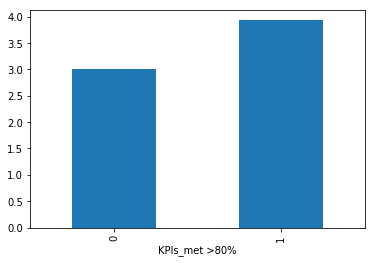

In [39]:
train["previous_year_rating"].groupby(train["KPIs_met >80%"]).mean().plot(kind='bar')

## From above figure we can say that people  having  KPI >80%  has higher previous year ratings

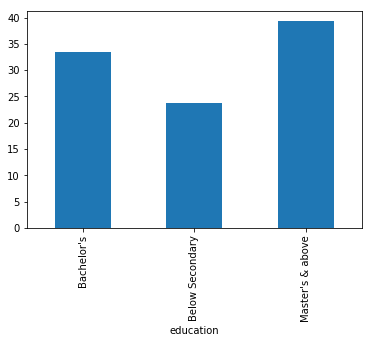

In [40]:
train["age"].groupby([train["education"]]).mean().plot(kind='bar')

## In the above figure we can see that people having higher degree has higher average age

In [41]:
train["education"].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [42]:
s=time.time()
for i in range (0,len(train)):
    if train.age[i]<35 and train.age[i]>25 and train["education"].isnull()[i]:
        train["education"][i]="Bachelor's"
    if train.age[i]<=25 and train["education"].isnull()[i]:
        train["education"][i]='Below Secondary'
    if train.age[i]>=35 and train["education"].isnull()[i]:
        train["education"][i]="Master's & above"
print("Time Taken:",time.time()-s)
for i in range (0,len(test)):
    if test.age[i]<35 and test.age[i]>25 and test["education"].isnull()[i]:
        test["education"][i]="Bachelor's"
    if test.age[i]<=25 and test["education"].isnull()[i]:
        test["education"][i]='Below Secondary'
    if test.age[i]>=35 and test["education"].isnull()[i]:
        test["education"][i]="Master's & above"
winsound.MessageBeep()

C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Time Taken: 520.2885072231293


C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
train["education"].isnull().sum()

0

In [44]:
train["education"].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [45]:
s=time.time()
for i in range (0,len(train)):
    if train["KPIs_met >80%"][i]==1 and train["previous_year_rating"].isnull()[i]:
        train["previous_year_rating"][i]=4
    if train["KPIs_met >80%"][i]==0 and train["previous_year_rating"].isnull()[i]:
        train["previous_year_rating"][i]=3
for i in range (0,len(test)):
    if test["KPIs_met >80%"][i]==1 and test["previous_year_rating"].isnull()[i]:
        test["previous_year_rating"][i]=4
    if test["KPIs_met >80%"][i]==0 and test["previous_year_rating"].isnull()[i]:
        test["previous_year_rating"][i]=3
e=time.time()
print("total time taken:",e-s)
winsound.MessageBeep()

C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\ipykern

total time taken: 772.0647873878479


In [46]:
train["previous_year_rating"].isnull().sum()

0

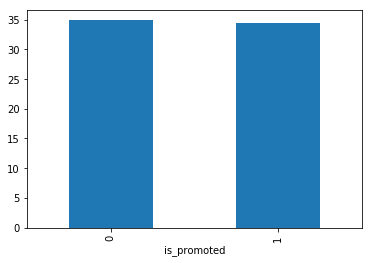

In [47]:
train["age"].groupby(train["is_promoted"]).mean().plot(kind='bar')

# ANNOVA TEST on AGE column

In [48]:
from scipy import stats

In [49]:
f ,p =stats.f_oneway(train["age"][train["is_promoted"]==1],train["age"][train['is_promoted']==0])
f,p

(16.154325642095483, 5.846304662318765e-05)

## As  we can see from the diagram as well as annova test that target column is not dependent on age

In [50]:
cat=[]
num=[]
for column in train.columns:
    if train[column].dtype=="object":
        cat.append(column)
    else:
        num.append(column)
train_cat=train.loc[:,cat]
train_num=train.loc[:,num]
test_cat=test.loc[:,cat]
test_num=test.loc[:,num]

C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [51]:
data_cat=pd.concat([train_cat,test_cat])
train_cat.shape,test_cat.shape,data_cat.shape

((54808, 5), (23490, 5), (78298, 5))

In [52]:
data_cat["education"].isnull().sum()

0

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_cat_encoded=data_cat.apply(lambda x:le.fit_transform(x))

In [54]:
train_cat_encoded=data_cat_encoded.iloc[:54808,:]
test_cat_encoded=data_cat_encoded.iloc[54808:,:]
train_cat_encoded.shape,test_cat_encoded.shape

((54808, 5), (23490, 5))

In [55]:
train_new=pd.concat([train_cat_encoded,train_num.iloc[:,1:]],axis=1)
test_new=pd.concat([test_cat_encoded,train_num.iloc[:,1:]],axis=1)

In [58]:
train_new.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0


In [59]:
train_new.drop(train_new["age"],inplace=True)

In [60]:
train_new.iloc[:,:-1].head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,2,0,2,1,35,5.0,8,1,0,49
1,4,14,0,1,0,1,30,5.0,4,0,0,60
2,7,10,0,1,2,1,34,3.0,7,0,0,50
3,7,15,0,1,0,2,39,1.0,10,0,0,50
4,8,18,0,1,0,1,45,3.0,2,0,0,73


In [61]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
train_scaled=std_scale.fit_transform(train_new.iloc[:,:-1])

C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [62]:
x=train_scaled
y=train_new["is_promoted"]

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.2)

In [64]:
from sklearn.metrics import f1_score,precision_score,recall_score,cohen_kappa_score,accuracy_score

In [65]:
t=time.time()
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
modelXg = XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=4, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',scale_pos_weight=3,seed=29)
modelXg.fit(x_train,y_train)
y_xg = modelXg.predict(x_cv)
print("tree_bagged",cohen_kappa_score(y_xg,y_cv),accuracy_score(y_cv,y_xg))
print("time taken:",time.time()-t,"seconds")

tree_bagged 0.4543890472494162 0.9271498995800621
time taken: 10.284700632095337 seconds


In [ ]:
x_train.shape

# test data

In [66]:
test_cat_encoded=test_cat.apply(lambda x:le.fit_transform(x))
test_new=pd.concat([test_cat_encoded,test_num.iloc[:,1:-1]],axis=1)
test_new.drop(test["age"],inplace=True)
test_new_scaled=std_scale.fit_transform(test_new)

C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [67]:
s=time.time()
solution=modelXg.predict(test_new_scaled)
print("time taken: ",time.time()-s)

time taken:  0.15920019149780273


In [68]:
test_scaled=std_scale.fit_transform(test_new)
solution=modelXg.predict(test_scaled)

C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nishant Kumar\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [69]:
winsound.MessageBeep()

In [68]:
sample_submission=pd.read_csv("sample_submission.csv")

In [69]:
sample_submission["is_promoted"].sum()

844

In [70]:
test["employee_id"].head(10)

0     8724
1    74430
2    72255
3    38562
4    64486
5    46232
6    54542
7    67269
8    66174
9    76303
Name: employee_id, dtype: int64

In [71]:
sample_submission["is_promoted"]=solution

In [72]:
sample_submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [73]:
sum(solution)

1340

In [74]:
sample_submission.to_csv("Sample_Submission.csv",index=False)